## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import cv2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

## Data Reading and Preprocessing

In [2]:
data = pd.read_csv('../bank-additional/bank-additional-full.csv',sep=';')
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
data = data.drop(['duration'], axis=1)

In [4]:
print(data.columns)

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'campaign', u'pdays',
       u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')


In [5]:
print(data.shape)

(41188, 20)


In [6]:
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

In [7]:
response = data['y']

In [8]:
response = np.array(response)
np.unique(response,return_counts=True)

(array(['no', 'yes'], dtype=object), array([36548,  4640]))

In [9]:
le = LabelEncoder()
for ix in categorical_columns:
    data[ix] = le.fit_transform(data[ix])

In [10]:
data = data.dropna()
data.head()
df = data

In [11]:
split = int(0.8*data.shape[0])

In [12]:
data = data.values

## Function to plot Confusion Matrix

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Decision Tree

In [14]:
dt = DecisionTreeClassifier(max_depth=9)
pred = dt.fit(data[:split,:-1],data[:split,-1]).predict(data[split:,:-1])
print('Training Accuracy: ' + str(dt.score(data[:,:-1],data[:,-1])) )
print('Validation Accuracy: ' + str(dt.score(data[split:,:-1],data[split:,-1])) )

Training Accuracy: 0.8947751772360881
Validation Accuracy: 0.6995630007283321


In [15]:
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True)

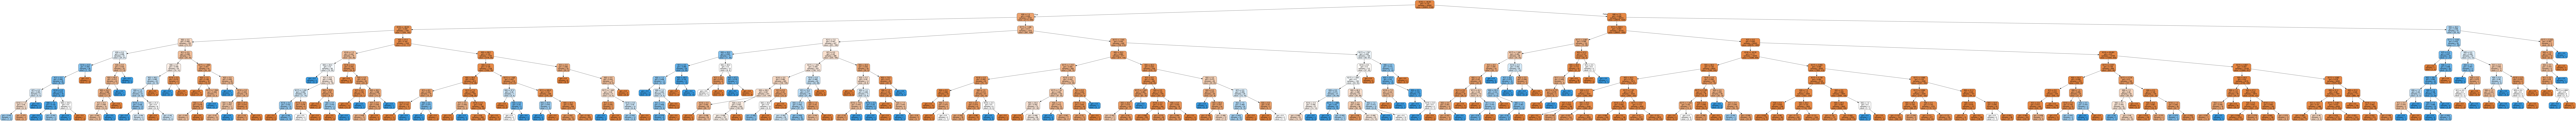

In [16]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [17]:
graph.write_png("../Assets/dtreeSmall.png")

True

In [18]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[5374  324]
 [2151  389]]


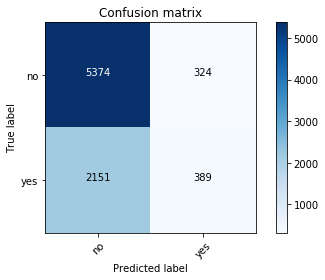

In [19]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

## Random Forest

In [20]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
pred = rf.fit(data[:split,:-1],data[:split,-1]).predict(data[split:,:-1])
print('Training Accuracy: ' + str(rf.score(data[:,:-1],data[:,-1])) )
print('Validation Accuracy: ' + str(rf.score(data[split:,:-1],data[split:,-1])) )

Training Accuracy: 0.8929542585218996
Validation Accuracy: 0.6921582908472931


In [21]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

[[5685   13]
 [2523   17]]


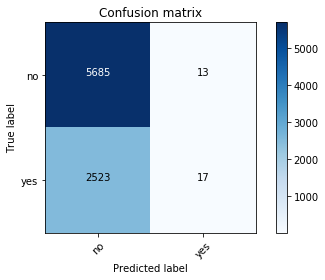

In [22]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

## Support Vector Machine

In [ ]:
svm = SVC(gamma='auto')
pred = svm.fit(data[:split,:-1],data[:split,-1]).predict(data[split:,:-1])
print('Training Accuracy: ' + str(svm.score(data[:,:-1],data[:,-1])) )
print('Validation Accuracy: ' + str(svm.score(data[split:,:-1],data[split:,-1])) )

In [ ]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

## Principal Component Analysis

In [ ]:
data_x = data[:,:-1]
pca = PCA(n_components=5)
data_x = pca.fit_transform(data_x)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

## Table Showing relations of Principle Components with various attributes of Data Frame

In [ ]:
print(pd.DataFrame(pca.components_,columns=df.columns[:-1],index = ['PC-1','PC-2','PC-3','PC-4','PC-5']))

In [ ]:
print(data_x.shape)

## Applying same algorithms on data obtained after PCA

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=9)
pred = dt.fit(data_x[:split],data[:split,-1]).predict(data_x[split:])
print('Training Accuracy: ' + str(dt.score(data_x[:],data[:,-1])) )
print('Validation Accuracy: ' + str(dt.score(data_x[split:],data[split:,-1])) )

In [ ]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

In [ ]:
dot_data = StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
graph.write_png("../Assets/dtreePCASmall.png")

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
pred = rf.fit(data_x[:split],data[:split,-1]).predict(data_x[split:])
print('Training Accuracy: ' + str(rf.score(data_x[:],data[:,-1])) )
print('Validation Accuracy: ' + str(rf.score(data_x[split:],data[split:,-1])) )

In [ ]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()

## Support Vector Macines

In [ ]:
svm = SVC(gamma='auto')
pred = svm.fit(data_x[:split],data[:split,-1]).predict(data_x[split:])
print('Training Accuracy: ' + str(svm.score(data_x[:],data[:,-1])) )
print('Validation Accuracy: ' + str(svm.score(data_x[split:],data[split:,-1])) )

In [ ]:
cnf_matrix = confusion_matrix(data[split:,-1], pred)
np.set_printoptions(precision=2)

In [ ]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['no','yes'],
                      title='Confusion matrix')
plt.show()